# Prepairing

## inSTAR PLATINum

In [ ]:
#metrics
!pip install -q git+https://github.com/google-research/bleurt.git
!pip install -q bert_score
!pip install -q rouge-score

#hugging
!pip install -q datasets
!pip install -q transformers
!pip install -q accelerate -U

#keras
!pip install -q --upgrade keras-nlp
!pip install -q --upgrade keras

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

## config

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "torch"
import keras_nlp
import keras

import transformers

import numpy as np

import torch
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda')

## random

In [ ]:
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
keras.utils.set_random_seed(SEED)
transformers.set_seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

## models

In [ ]:
LLAMA = "JackFram/llama-160m"
CACHE_DIR = "./llama/160m"

## constraints

In [ ]:
DIR_CONSTRAINTS_PATH = '/content/drive/My Drive/Colab Notebooks/NLP_models_qa_testing/text-generation/constraints/'

# Datasets

In [ ]:
import datasets

## datasets

In [ ]:
SQUAD_V2 = "squad_v2"
SQL_CONTEXT = "b-mc2/sql-create-context"
ADVERSARIAL_QA = "adversarial_qa"

In [ ]:
squad2 = datasets.load_dataset(SQUAD_V2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [ ]:
sql = datasets.load_dataset(SQL_CONTEXT)

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
adversarial_qa = datasets.load_dataset(ADVERSARIAL_QA, 'adversarialQA')

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
squad2['train'].to_pandas().loc[0:0]

,id,title,context,question,answers
0,56be85543aeaaa14008c9063,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,"{'text': ['in the late 1990s'], 'answer_start'..."


In [ ]:
sql['train'].to_pandas().loc[0:0]

,question,answer,context
0,How many heads of the departments are older th...,SELECT COUNT(*) FROM head WHERE age > 56,CREATE TABLE head (age INTEGER)


In [ ]:
adversarial_qa['train'].to_pandas().loc[0:0]

,id,title,context,question,answers,metadata
0,7ba1e8f4261d3170fcf42e84a81dd749116fae95,Brain,Another approach to brain function is to exami...,What sare the benifts of the blood brain barrir?,"{'text': ['isolated from the bloodstream'], 'a...","{'split': 'train', 'model_in_the_loop': 'Combi..."


## tokenizers

In [ ]:
llama_tokenizer = transformers.AutoTokenizer.from_pretrained(
    LLAMA,
    model_max_length=256,
    cache_dir="./llama/160m",
    padding_side='left',
)

tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

## preprocess of data

In [ ]:
MAX_TOKENS = 128

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
def get_entire_dataset(dataset, names_arr):
  df_list = [dataset[name].to_pandas() for name in names_arr]
  return pd.concat(df_list)

In [ ]:
squad2 = get_entire_dataset(squad2, ['train','validation'])
sql = get_entire_dataset(sql, ['train'])
adversarial_qa = get_entire_dataset(adversarial_qa, ['train','validation','test'])

In [ ]:
def extract_answer(answer_dict):
    text_list = answer_dict.get('text', [])
    non_empty_text_list = [text for text in text_list if text]
    return non_empty_text_list[0] if non_empty_text_list else None

In [ ]:
ANSWER = 'answer'
CONTEXT = 'context'
QUESTION = 'question'

SPLITS = ['train', 'validation', 'test']

for dataset in [squad2, adversarial_qa]:
  dataset[ANSWER] = dataset['answers'].apply(extract_answer)
  dataset.dropna(subset=[ANSWER], inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def constraints_qa(dataset, name):
  conditions = np.load(f'{DIR_CONSTRAINTS_PATH}{name}.npy')
  dataset = dataset[conditions]
  print(f"Current length: {len(dataset)}")
  return dataset

In [ ]:
squad2 = constraints_qa(squad2,"squad2")

Current length: 6989


In [ ]:
sql = constraints_qa(sql, "sql")

Current length: 76432


In [ ]:
adversarial_qa = constraints_qa(adversarial_qa, "adversarial_qa")

Current length: 3242


In [ ]:
def split_to_valid_test(dataset, valid, test):
  train, validation_and_test = train_test_split(dataset, test_size=valid+test)
  valid, test = train_test_split(validation_and_test, test_size=test/(valid + test))
  new_dataset = {
      'train': datasets.Dataset.from_dict(train),
      'validation': datasets.Dataset.from_dict(valid),
      'test': datasets.Dataset.from_dict(test)
  }
  return new_dataset

In [ ]:
squad2 = split_to_valid_test(squad2, 0.1, 0.1)
sql = split_to_valid_test(sql, 0.1, 0.1)
adversarial_qa = split_to_valid_test(adversarial_qa, 0.1, 0.1)

In [ ]:
import math
def save_percent_dataset(dataset, percent):
  num_shards = math.ceil(100/percent)

  for split in SPLITS:
    dataset[split] = dataset[split].shuffle(seed=SEED)
    dataset[split] = dataset[split].shard(num_shards=num_shards, index=0)

  return dataset

In [ ]:
sql = save_percent_dataset(sql,10)

In [ ]:
squad2

{'train': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 5591
 }),
 'validation': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 699
 }),
 'test': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 699
 })}

In [ ]:
sql

{'train': Dataset({
     features: ['question', 'answer', 'context'],
     num_rows: 6115
 }),
 'validation': Dataset({
     features: ['question', 'answer', 'context'],
     num_rows: 765
 }),
 'test': Dataset({
     features: ['question', 'answer', 'context'],
     num_rows: 765
 })}

In [ ]:
adversarial_qa

{'train': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 2593
 }),
 'validation': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 324
 }),
 'test': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 325
 })}

## dict

In [ ]:
dataset_dict = {
    SQUAD_V2: squad2,
    SQL_CONTEXT: sql,
    ADVERSARIAL_QA: adversarial_qa,
}

# LLaMA

In [ ]:
FINETUNING_LEARNING_RATE = 1e-5
FINETUNING_EPOCHS = 3
WEIGHT_DECAY = 0.01

START_TOKEN = 1 #<s>
END_TOKEN = 2 #<\s>
PAD_TOKEN = 2 #<\s>

BATCH_SIZE = 32

OPTIMAL_LR_EXAPLES_FROM_DATASETS = 32

BATCH_SIZE_GENERATE = 64

In [ ]:
llama_tokenizer.pad_token_id = PAD_TOKEN
llama_tokenizer.start_token_id = START_TOKEN
llama_tokenizer.end_token_id = END_TOKEN

## data for optimal lr

In [ ]:
import random

In [ ]:
a_little_train = []
for dataset in dataset_dict.values():
  train = dataset['train']

  for i in range(0, OPTIMAL_LR_EXAPLES_FROM_DATASETS):
    rand_t = random.randint(1, len(train))-1
    a_little_train.append(train[rand_t])

a_little_from_every_dataset = new_dataset = {
      'train': datasets.Dataset.from_list(a_little_train),
}

a_little_from_every_dataset

{'train': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 96
 })}

## convert dataset to a training data

In [ ]:
import torch

In [ ]:
def convert_text(text, tokenizer):
  input_ids = tokenizer.encode(text)

  labels = input_ids + [tokenizer.eos_token_id]
  input_ids = [tokenizer.bos_token_id] + input_ids
  mask = [1] * len(input_ids)

  pad_size = MAX_TOKENS - len(input_ids)

  if(pad_size>0):
    input_ids = [tokenizer.pad_token_id]*pad_size+input_ids
    labels = [tokenizer.pad_token_id]*pad_size+labels
    mask = [0]*pad_size+mask

  return input_ids, mask, labels

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
def convert_dataset(dataset, tokenizer):
  list_input_ids = []
  list_mask = []
  list_labels = []

  for example in dataset:
    context = example[CONTEXT]
    question = example[QUESTION]
    answer = example[ANSWER]

    text = "context:" + context + " question:" + question + " answer:" + answer

    input_ids, mask, labels = convert_text(text, tokenizer)

    list_input_ids.append(input_ids)
    list_mask.append(mask)
    list_labels.append(labels)

  input_ids = torch.tensor(list_input_ids)
  mask = torch.tensor(list_mask)
  labels = torch.tensor(list_labels)

  return TensorDataset(input_ids, mask, labels)

In [ ]:
def prepair_dataset_for_train(dataset, tokenizer):
  train = convert_dataset(dataset['train'], tokenizer)

  return {
      'train': train,
  }

In [ ]:
squad2_train = prepair_dataset_for_train(squad2, llama_tokenizer)
sql_train = prepair_dataset_for_train(sql, llama_tokenizer)
adversarial_qa_train = prepair_dataset_for_train(adversarial_qa, llama_tokenizer)

In [ ]:
train_datasets = [squad2['train'], sql['train'], adversarial_qa['train']]
concatenated_train_dataset = datasets.concatenate_datasets(train_datasets)

all_dataset = datasets.DatasetDict({
    'train': concatenated_train_dataset,
})

all_dataset = prepair_dataset_for_train(all_dataset, llama_tokenizer)

In [ ]:
a_little_from_every_dataset = prepair_dataset_for_train(a_little_from_every_dataset, llama_tokenizer)

In [ ]:
squad2_train

{'train': <torch.utils.data.dataset.TensorDataset at 0x7fa020dcaf50>}

In [ ]:
sql_train

{'train': <torch.utils.data.dataset.TensorDataset at 0x7fa020dcb850>}

In [ ]:
adversarial_qa_train

{'train': <torch.utils.data.dataset.TensorDataset at 0x7fa07e063ca0>}

In [ ]:
all_dataset

{'train': <torch.utils.data.dataset.TensorDataset at 0x7fa020efd060>}

In [ ]:
a_little_from_every_dataset

{'train': <torch.utils.data.dataset.TensorDataset at 0x7fa020eff130>}

## plot optimal lr

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_optimal_lr(losses, lrs):
  plt.figure(figsize=(10, 10))
  plt.semilogx(lrs, losses)
  plt.xlabel('Learning Rate')
  plt.ylabel('Loss')
  plt.show()

## get model for train

In [ ]:
def get_model_for_train():
  model = transformers.AutoModelForCausalLM.from_pretrained(
    LLAMA,
    cache_dir=CACHE_DIR,
  )

  for param in model.parameters():
    param.requires_grad = False

  for layer in model.model.layers:
      for param in layer.parameters():
          param.requires_grad = True

  return model.to(DEVICE)

## find optimal lr

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import LambdaLR

In [ ]:
def find_optimal_lr(model, dataset, learning_rate, num_epochs, lr_lambda):
  losses = []
  lrs = []

  # Define optimizer and scheduler
  optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=WEIGHT_DECAY)
  scheduler = LambdaLR(optimizer, lr_lambda)

  model.train()

  # Define dataloader
  dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

  # TRAIN🚉
  for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch in dataloader:
      input_ids, attention_mask, labels = batch
      input_ids = input_ids.to(DEVICE)
      attention_mask = attention_mask.to(DEVICE)
      labels = labels.to(DEVICE)

      optimizer.zero_grad()

      outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
      loss = outputs.loss

      loss.backward()
      optimizer.step()

      epoch_loss += loss.item()

    scheduler.step()

    lr = scheduler.get_last_lr()[0]
    loss = epoch_loss/len(dataloader)
    print(f'Epoch {epoch+1}, Loss: {loss}, Learning rate: {lr}')
    losses.append(loss)
    lrs.append(lr)

  torch.cuda.empty_cache()
  return losses, lrs

In [ ]:
llama_lr_model = get_model_for_train()

losses, lrs = find_optimal_lr(llama_lr_model, a_little_from_every_dataset['train'], 1e-8, 160, lambda epoch: 10**(epoch/25))

Epoch 1, Loss: 12.930395126342773, Learning rate: 1.0964781961431851e-08
Epoch 2, Loss: 12.924229303995768, Learning rate: 1.202264434617413e-08
Epoch 3, Loss: 12.917398452758789, Learning rate: 1.3182567385564071e-08
Epoch 4, Loss: 12.90962028503418, Learning rate: 1.4454397707459274e-08
Epoch 5, Loss: 12.901206016540527, Learning rate: 1.5848931924611136e-08
Epoch 6, Loss: 12.89186922709147, Learning rate: 1.7378008287493753e-08
Epoch 7, Loss: 12.882020950317383, Learning rate: 1.9054607179632472e-08
Epoch 8, Loss: 12.871283849080404, Learning rate: 2.0892961308540398e-08
Epoch 9, Loss: 12.859081904093424, Learning rate: 2.2908676527677733e-08
Epoch 10, Loss: 12.846035639444986, Learning rate: 2.51188643150958e-08
Epoch 11, Loss: 12.83149496714274, Learning rate: 2.7542287033381663e-08
Epoch 12, Loss: 12.815731366475424, Learning rate: 3.019951720402016e-08
Epoch 13, Loss: 12.798611005147299, Learning rate: 3.311311214825911e-08
Epoch 14, Loss: 12.778751055399576, Learning rate: 3.63

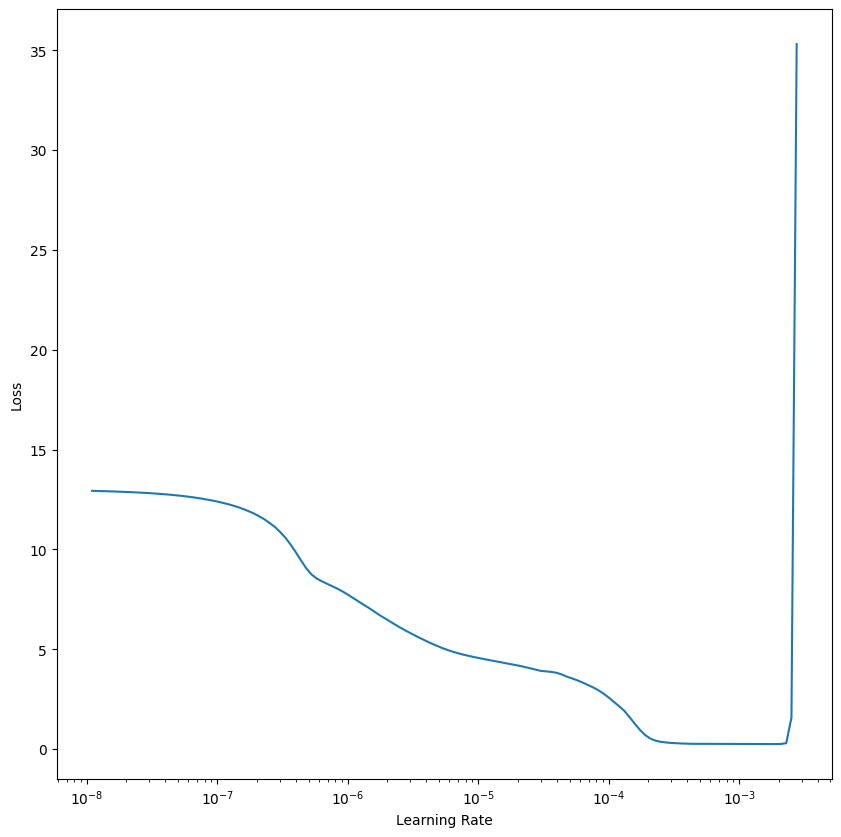

In [ ]:
plot_optimal_lr(losses,lrs)

## train function

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import LambdaLR

In [ ]:
def train(dataset, model, learning_rate, num_epochs):
  optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=WEIGHT_DECAY)

  model.train()

  # Define dataloader
  dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

  # TRAIN🚉
  for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch in dataloader:
      input_ids, attention_mask, labels = batch
      input_ids = input_ids.to(DEVICE)
      attention_mask = attention_mask.to(DEVICE)
      labels = labels.to(DEVICE)

      optimizer.zero_grad()

      outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
      loss = outputs.loss

      loss.backward()
      optimizer.step()

      # Update the epoch loss
      epoch_loss += loss.item()

    loss = epoch_loss/len(dataloader)
    print(f'Epoch {epoch+1}, Loss: {loss}')

  torch.cuda.empty_cache()
  model.eval()
  return model

## data examples

In [ ]:
def get_example(dataset):
  test = dataset['test']

  rand = random.randint(1, len(test))-1
  row = test[rand]
  context = row[CONTEXT]
  question = row[QUESTION]
  answer = row[ANSWER]

  print(f"Context: {context}\n")
  print(f"Question: {question}\n")
  print(f"Answer: {answer}")

  query = "context: " + context + " question:" + question + " answer:"
  return query

In [ ]:
squad2_ex = [get_example(squad2)]

Context: The Ministry of Defence (MoD) is the British government department responsible for implementing the defence policy set by Her Majesty's Government, and is the headquarters of the British Armed Forces.

Question: For which part of the government is the MoD the headquarters?

Answer: British Armed Forces


In [ ]:
sql_ex = [get_example(sql)]

Context: CREATE TABLE table_name_78 (college VARCHAR, team VARCHAR, position VARCHAR)

Question: What college has the Chicago stags and position is G?

Answer: SELECT college FROM table_name_78 WHERE team = "chicago stags" AND position = "g"


In [ ]:
adversarial_ex = [get_example(adversarial_qa)]

Context: International tribunals and arbiters are often called upon to resolve substantial disputes over treaty interpretations. To establish the meaning in context, these judicial bodies may review the preparatory work from the negotiation and drafting of the treaty as well as the final, signed treaty itself.

Question: What makes a treaty final?

Answer: signed


## models

In [ ]:
def model_respond(input_list, model):
  responses = []

  for i in range(0, len(input_list), BATCH_SIZE_GENERATE):
    batch = input_list[i:i+BATCH_SIZE_GENERATE]
    tokens = llama_tokenizer(batch, return_tensors='pt', padding=True, truncation=True)
    inputs = tokens.input_ids.to(DEVICE)
    mask = tokens.attention_mask.to(DEVICE)
    responds = model.generate(
        inputs,
        max_length=MAX_TOKENS,
        attention_mask=mask,
        pad_token_id=llama_tokenizer.pad_token_id
    )
    for res, input in zip(responds, batch):
      respond = llama_tokenizer.decode(res, skip_special_tokens=True)
      respond = respond.replace(input, '', 1).lstrip()
      responses.append(respond)

  return responses

### vanila

In [ ]:
vanila_llama = transformers.AutoModelForCausalLM.from_pretrained(
    LLAMA,
    cache_dir=CACHE_DIR,
).to(DEVICE)

def llama_vanila_dict(input):
  respond = model_respond(input, vanila_llama)
  return respond

print(f"vanila: {llama_vanila_dict(squad2_ex)}")

vanila: ['For which part of the government is the MoD the headquarters? answer:For which part of the government is the MoD the headquarters? answer:For which part of the government is the MoD the headquarters? answer:For which part of the government is the MoD the headquarters? answer:For which part of the government is the Mo']


In [ ]:
vanila_llama

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 768)
    (layers): ModuleList(
      (0-11): 12 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=768, out_features=768, bias=False)
          (k_proj): Linear(in_features=768, out_features=768, bias=False)
          (v_proj): Linear(in_features=768, out_features=768, bias=False)
          (o_proj): Linear(in_features=768, out_features=768, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=768, out_features=3072, bias=False)
          (up_proj): Linear(in_features=768, out_features=3072, bias=False)
          (down_proj): Linear(in_features=3072, out_features=768, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
  )
  (lm_head): Linear(in_feat

### squad2

In [ ]:
squad2_llama = get_model_for_train()

In [ ]:
squad2_llama = train(squad2_train['train'], squad2_llama, FINETUNING_LEARNING_RATE, FINETUNING_EPOCHS)

Epoch 1, Loss: 5.150688392094203
Epoch 2, Loss: 4.2873057392665315
Epoch 3, Loss: 3.98303524017334


In [ ]:
def llama_squad2_dict(input):
  return model_respond(input, squad2_llama)

print(f"squad2: {llama_squad2_dict(squad2_ex)}")

squad2: ['British']


### sql

In [ ]:
sql_llama = get_model_for_train()

In [ ]:
sql_llama = train(sql_train['train'], sql_llama, FINETUNING_LEARNING_RATE, FINETUNING_EPOCHS)

Epoch 1, Loss: 2.7324977858612933
Epoch 2, Loss: 1.6192160087327163
Epoch 3, Loss: 1.4158360821505387


In [ ]:
def llama_sql_dict(input):
  return model_respond(input, sql_llama)

print(f"sql: {llama_sql_dict(sql_ex)}")

sql: ['college college bow, team Chicago answer: college bow, position answer: college bow, position answer: college bow, position answer: college bow, position answer: college bow, position answer: college bow, position answer: college bow, position answer: college bow, position answer: college bow, position answer: college bow, position answer: college bow, position answer: college bow, position answer: college bow, position answer: college bow, position']


### adversarial_qa

In [ ]:
adversarial_qa_llama = get_model_for_train()

In [ ]:
adversarial_qa_llama = train(adversarial_qa_train['train'], adversarial_qa_llama, FINETUNING_LEARNING_RATE, FINETUNING_EPOCHS)

Epoch 1, Loss: 5.544474665711566
Epoch 2, Loss: 4.459456792691859
Epoch 3, Loss: 4.004293851736115


In [ ]:
def llama_adversarial_qa_dict(input):
  return model_respond(input, adversarial_qa_llama)

print(f"adversarial_qa: {llama_adversarial_qa_dict(adversarial_ex)}")

adversarial_qa: ['the of the treat the the the the the the the the the the the the the the the the the the the answerant the the answer the answer the answer the answer the answer the answer the answer answer the answer answer the answer answer the answer answer the']


### all datasets

In [ ]:
all_llama = get_model_for_train()

In [ ]:
all_llama = train(all_dataset['train'], all_llama, FINETUNING_LEARNING_RATE, FINETUNING_EPOCHS)

Epoch 1, Loss: 3.7069842810065423
Epoch 2, Loss: 2.9128843948611745
Epoch 3, Loss: 2.5659418564781515


In [ ]:
def llama_all_dict(input):
  return model_respond(input, all_llama)

print("ALL:")
print(f"squad2: {llama_all_dict(squad2_ex)}")
print(f"sql: {llama_all_dict(sql_ex)}")
print(f"adversarial_qa: {llama_all_dict(adversarial_ex)}")

ALL:
squad2: ['Britains']
sql: ['college collegerew bow x x period 0rewrew bow x period0rew bow x period0rew']
adversarial_qa: ['y the of treat']


### dict

In [ ]:
squad_v2_models = {
    "LLaMA": llama_vanila_dict,
    "LLaMA_SQUAD2": llama_squad2_dict,
    "LLaMA_ALL": llama_all_dict,
}

In [ ]:
sql_context_models = {
    "LLaMA": llama_vanila_dict,
    "LLaMA_SQL": llama_sql_dict,
    "LLaMA_ALL": llama_all_dict,
}

In [ ]:
adversarial_qa_models = {
    "LLaMA": llama_vanila_dict,
    "LLaMA_ADV": llama_adversarial_qa_dict,
    "LLaMA_ALL": llama_all_dict,
}

# Metrics

In [ ]:
from typing import List

## EditDistance

In [ ]:
edit_distance = keras_nlp.metrics.EditDistance(normalize=False)

def edit_distance_dict(y_true, y_pred) -> List[float]:
  true = [ans.split() for ans in y_true]
  pred = [pre.split() for pre in y_pred]
  if DEVICE.type == 'cpu':
    return edit_distance(true, pred).numpy().tolist()

  return edit_distance(true, pred).cpu().numpy().tolist()

EditDistance is a string metric that quantify how dissimilar two strings are to one another. It measures this by counting the minimum number of operations required to transform one string into the other

## RougeN

In [ ]:
rouge_n = keras_nlp.metrics.RougeN(order=3)

def rouge_n_dict(y_true, y_pred) -> List[float]:
  if DEVICE.type == 'cpu':
    return rouge_n(y_true, y_pred)["f1_score"].numpy().tolist()

  return rouge_n(y_true, y_pred)["f1_score"].cpu().numpy().tolist()

RougeN is a set of metrics that measures the overlap of n-grams between the model output and reference sentence.

## Bleurt

In [ ]:
bleurt = datasets.load_metric('bleurt', "bleurt-tiny-512", trust_remote_code=True)

def bleurt_dict(y_true, y_pred) -> List[float]:
  return bleurt.compute(predictions=y_pred, references=y_true)['scores']

# yeah, thanks for that "evaluate" ad, but it doesn't work with keras 3.

<ipython-input-42-ce9e1b0d2d0a>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleurt = datasets.load_metric('bleurt', "bleurt-tiny-512", trust_remote_code=True)


Bleurt is an evaluation metric that takes a pair of sentences as input, a reference and a candidate, and it returns a score that indicates to what extent the candidate is fluent and conveys the meaning of the reference.

## BertScore

In [ ]:
bert_score = datasets.load_metric('bertscore', trust_remote_code=True, model_type='bert-base-uncased')

def bert_score_dict(y_true, y_pred) -> List[float]:
  return bert_score.compute(predictions=y_pred, references=y_true, lang='en')['recall']

BertScore is a metric that calculates the similarity between a model respond output and a reference sentence using sentence representation (embeddings from BERT).

## dict

In [ ]:
metrics_dict = {
    "EditDistance": edit_distance_dict,
    "RougeN": rouge_n_dict,
    "Bleurt": bleurt_dict,
    "BertScore": bert_score_dict,
}

# Diagrams

In [ ]:
import matplotlib.pyplot as plt

## get model responds

In [ ]:
def get_model_responds(dataset, model) -> float:
  queryes = []
  answers = dataset['test'][ANSWER]

  for example in dataset['test']:
    context = example[CONTEXT]
    question = example[QUESTION]

    query = "context: " + context + " question:" + question + " answer:"
    queryes.append(query)

  responds = model(queryes)
  return responds, answers

## plot function

In [ ]:
def plot_dataset(dataset, dataset_name, dict_models, dict_metrics, colors):
    data = {}

    models_responds = []
    true_lables = []
    for model in dict_models.values():
      responds, answers = get_model_responds(dataset,model)
      models_responds.append(responds)
      true_lables.append(answers)


    for metric_name, metric in dict_metrics.items():
        models = list(dict_models.keys())
        values = []

        for responds, answers in zip(models_responds, true_lables):
          results = metric(answers, responds)
          mean_result = np.mean(results) if results else 0

          values.append(mean_result)

        data[metric_name] = {'models': models, 'values': values, 'colors': colors}

    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    epsilon = 0.001

    for ax, (title, plot_data) in zip(axs.flatten(), data.items()):
        ax.bar(plot_data['models'], plot_data['values'], color=plot_data['colors'])
        ax.set_title(title)
        ax.set_xlabel('Models')
        ax.set_ylabel('Evaluation metrics')
        ax.autoscale(tight=True)

        min_val = min(plot_data['values'])
        max_val = max(plot_data['values'])
        border = abs(max_val-min_val)*0.1 + epsilon

        ax.set_ylim(min_val - border, max_val + border)

    fig.suptitle(dataset_name, fontsize=16)

    plt.tight_layout()
    plt.show()

## plot metrics

In [ ]:
COLORS = ['purple','green','orange']

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


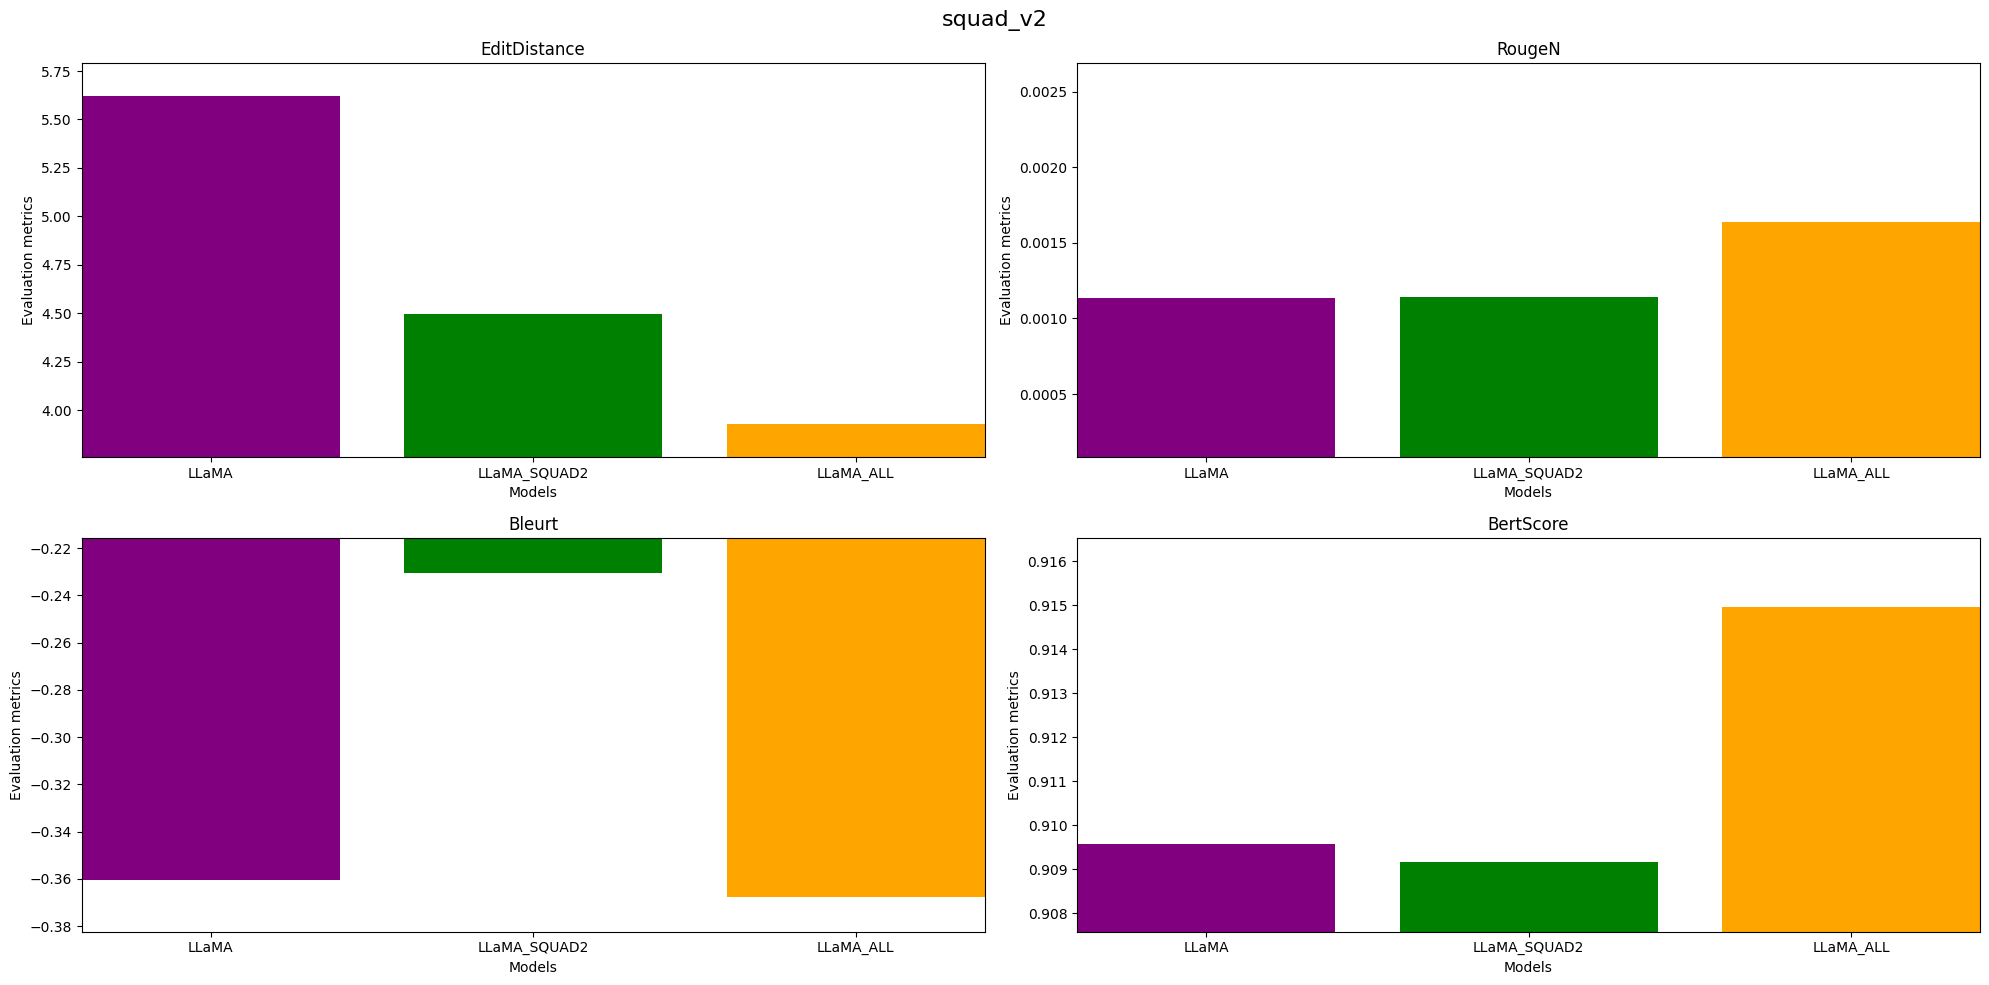

In [ ]:
plot_dataset(squad2, SQUAD_V2, squad_v2_models, metrics_dict, COLORS)

LLaMA_ALL outperforms in EditDistance, RougeN, and BertScore. LLaMA_SQUAD2 excels in the Bleurt metric. However, when considering the average performance across all metrics, LLaMA_ALL emerges as the overall winner.

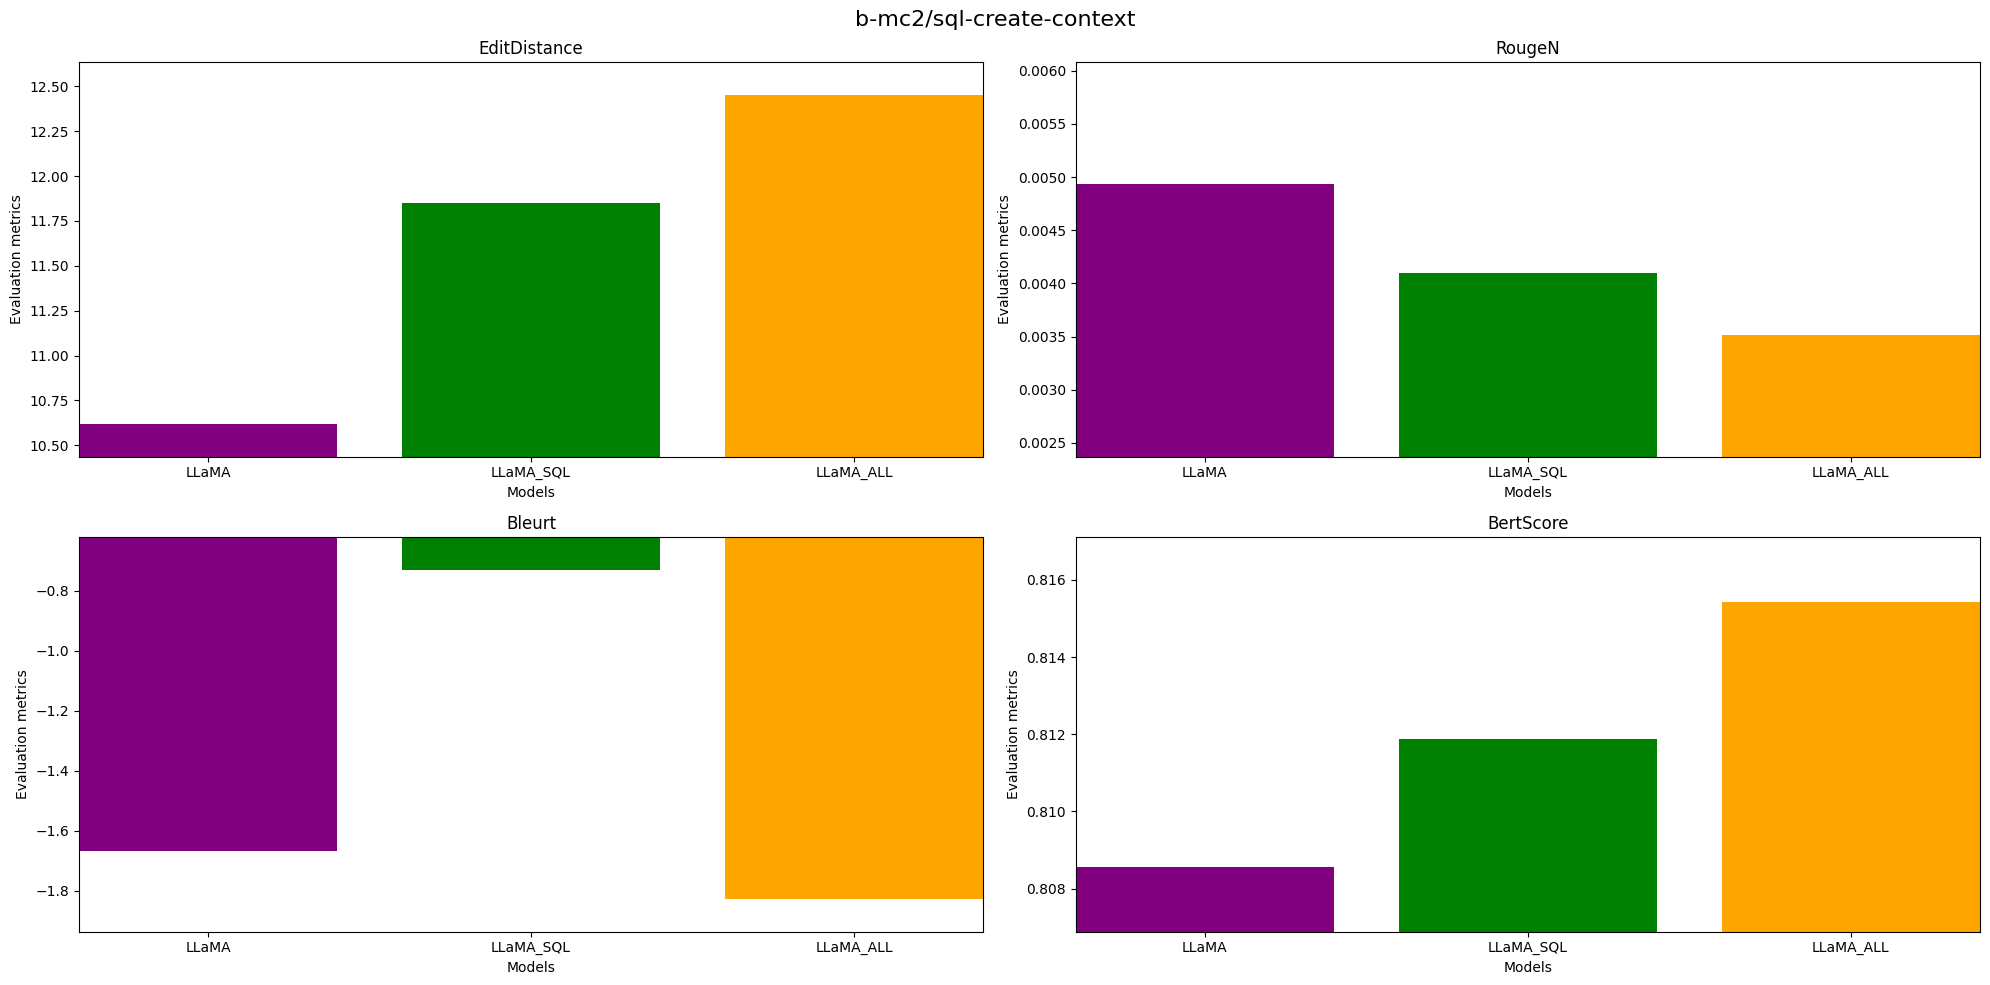

In [ ]:
plot_dataset(sql, SQL_CONTEXT, sql_context_models, metrics_dict, COLORS)

LLaMA leads in EditDistance and RougeN metrics. LLaMA_SQL excels in the Bleurt metric, and is also the best performer for the b-mc2/sql-create-context dataset. LLaMA_ALL tops the BertScore metric.

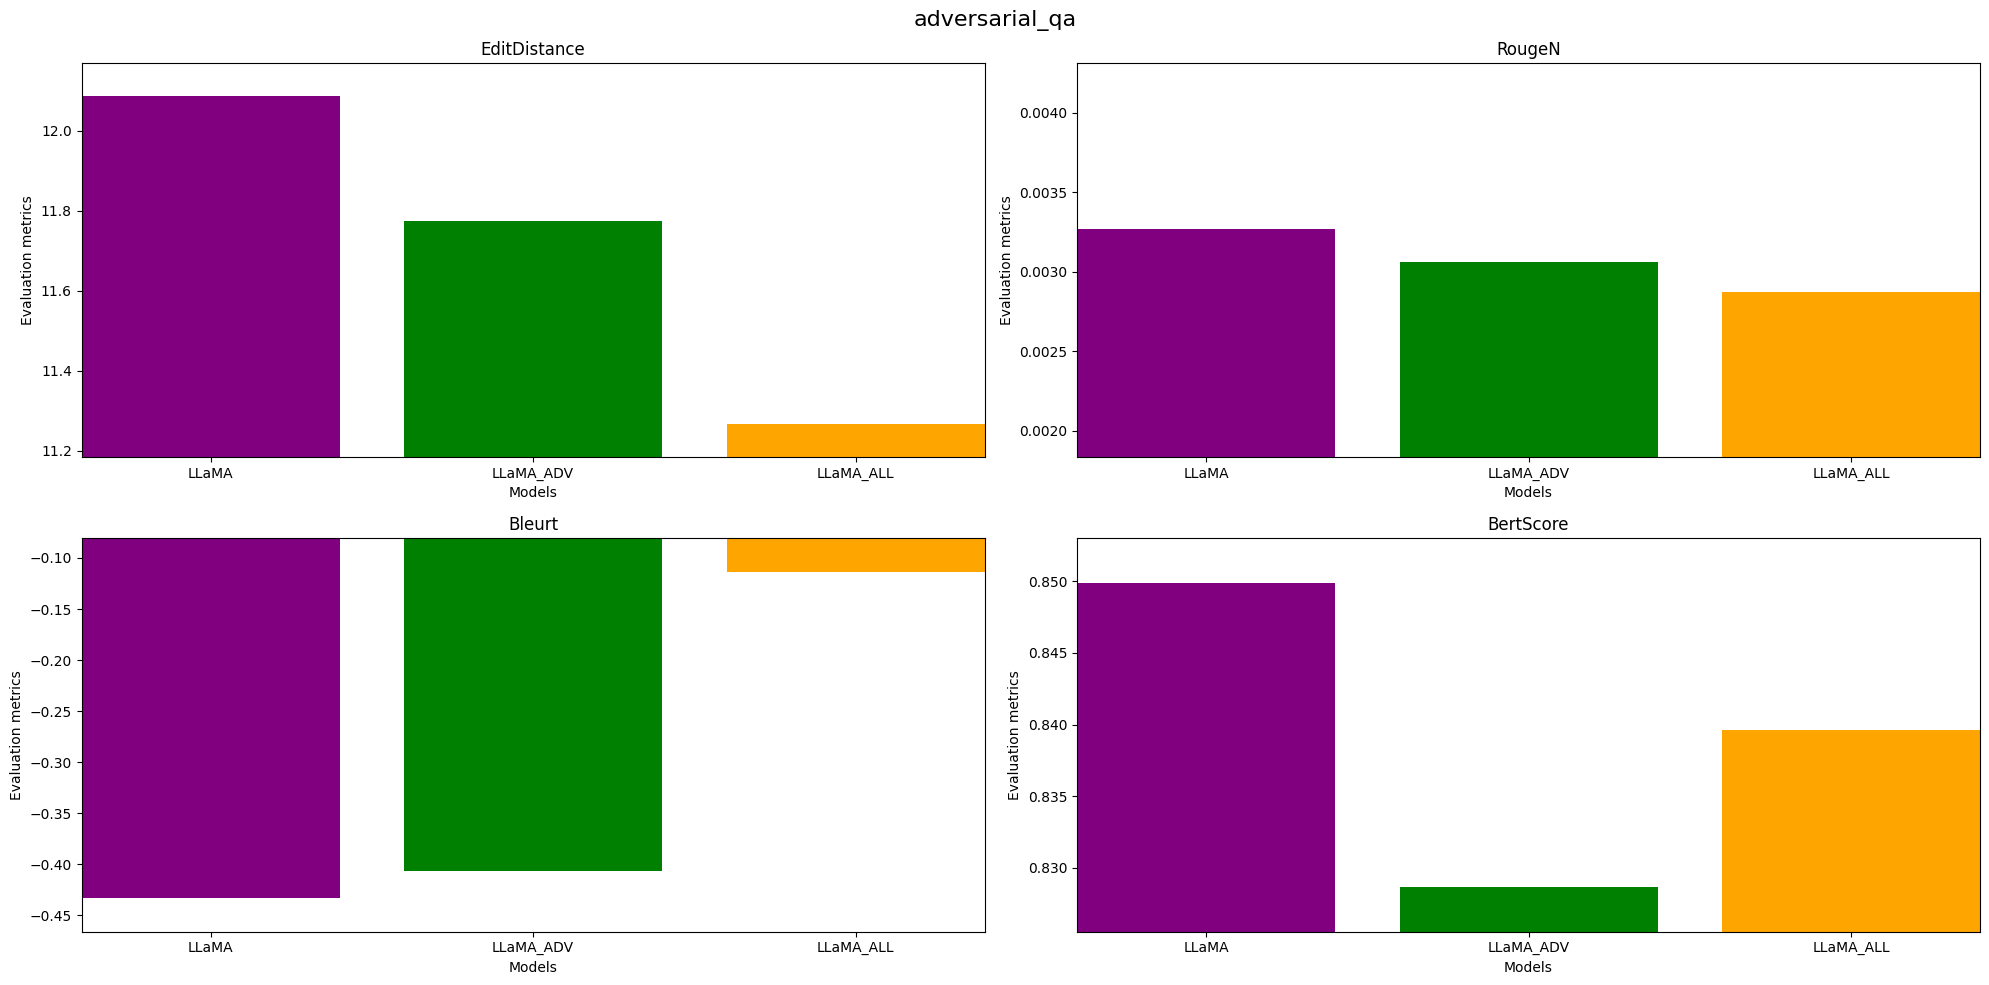

In [ ]:
plot_dataset(adversarial_qa, ADVERSARIAL_QA, adversarial_qa_models, metrics_dict, COLORS)

LLaMA_ALL leads in EditDistance and Bleurt metrics, while LLaMA excels in RougeN and BertScore metrics. However, when considering the average performance on the adversarial_qa dataset, LLaMA_ALL emerges as the overall winner.

In the evaluation of the models across three plots, the LLaMA_ALL model emerges as the overall winner. This is likely due to its training on three diverse datasets, enabling it to learn high contextual features specific for predictions in the QA problem. While LLaMA_ALL shows better results, it’s important to note that this doesn’t imply the other models are inferior. They all exhibit similar results, with LLaMA_ALL appearing to be more adaptive to a variety of tasks.